In [1]:
from __future__ import absolute_import, division, print_function 
 
import tensorflow as tf
import tensorflow_datasets as tfds
 
import math
import numpy as np
import matplotlib.pyplot as plt
 
#import tqdm
#import tqdm.auto
#tqdm.tqdm = tqdm.auto.tqdm

In [26]:
# path = 'fashion_mnist'
def load_train(path):
    dataset, metadata = tfds.load(path, as_supervised=True, with_info=True)
    train_dataset, test_dataset = dataset['train'], dataset['test']
    return metadata, train_dataset, test_dataset    

In [27]:
metadata, train_dataset, test_dataset = load_train('fashion_mnist')

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
     images = tf.cast(images, tf.float32)  # Casts a tensor to a new type
     images /= 255
     return images, labels
 
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

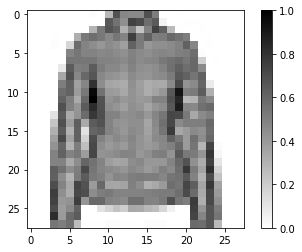

In [7]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
# print(image.shape, label.shape)
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

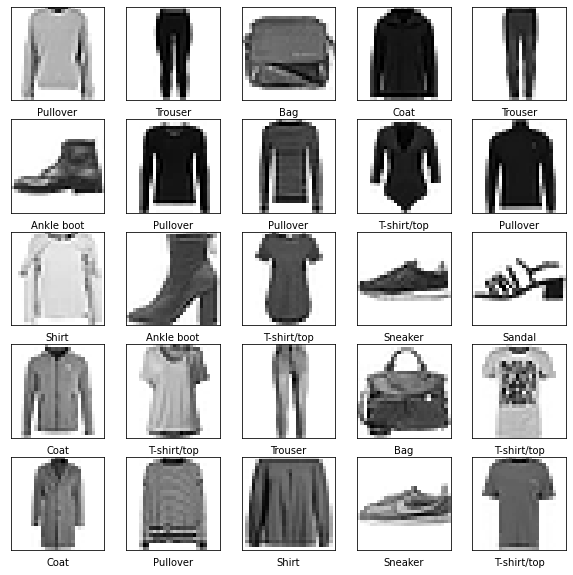

In [8]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [9]:
def create_model(input_shape):
    model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=input_shape),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [10]:
model = create_model((28, 28, 1))

In [11]:
def train_model(train_dataset, test_dataset, model, batches, epoch):
    BATCH_SIZE = batches; #32
    train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
    test_dataset = test_dataset.batch(BATCH_SIZE)

    model.fit(train_dataset, epochs=epoch, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

    print('');
    test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
    print('Accuracy on test dataset:', test_accuracy)

    return model   

In [12]:
model = train_model(train_dataset, test_dataset, model, 32, 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8921

313/313 [==============================] - 1s 1ms/step - loss: 0.3515 - accuracy: 0.8763
Accuracy on test dataset: 0.8762999773025513
